Unclassified Learning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt 
%matplotlib inline 

import sklearn



In [2]:
diabetes_df = pd.read_csv(r"C:\Users\user\Documents\ML learning\Datasets\diabetes.csv")
diabetes_df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

EDA

In [3]:
diabetes_df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
#show count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
#impute the mean value of the columns to each 
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace = True)

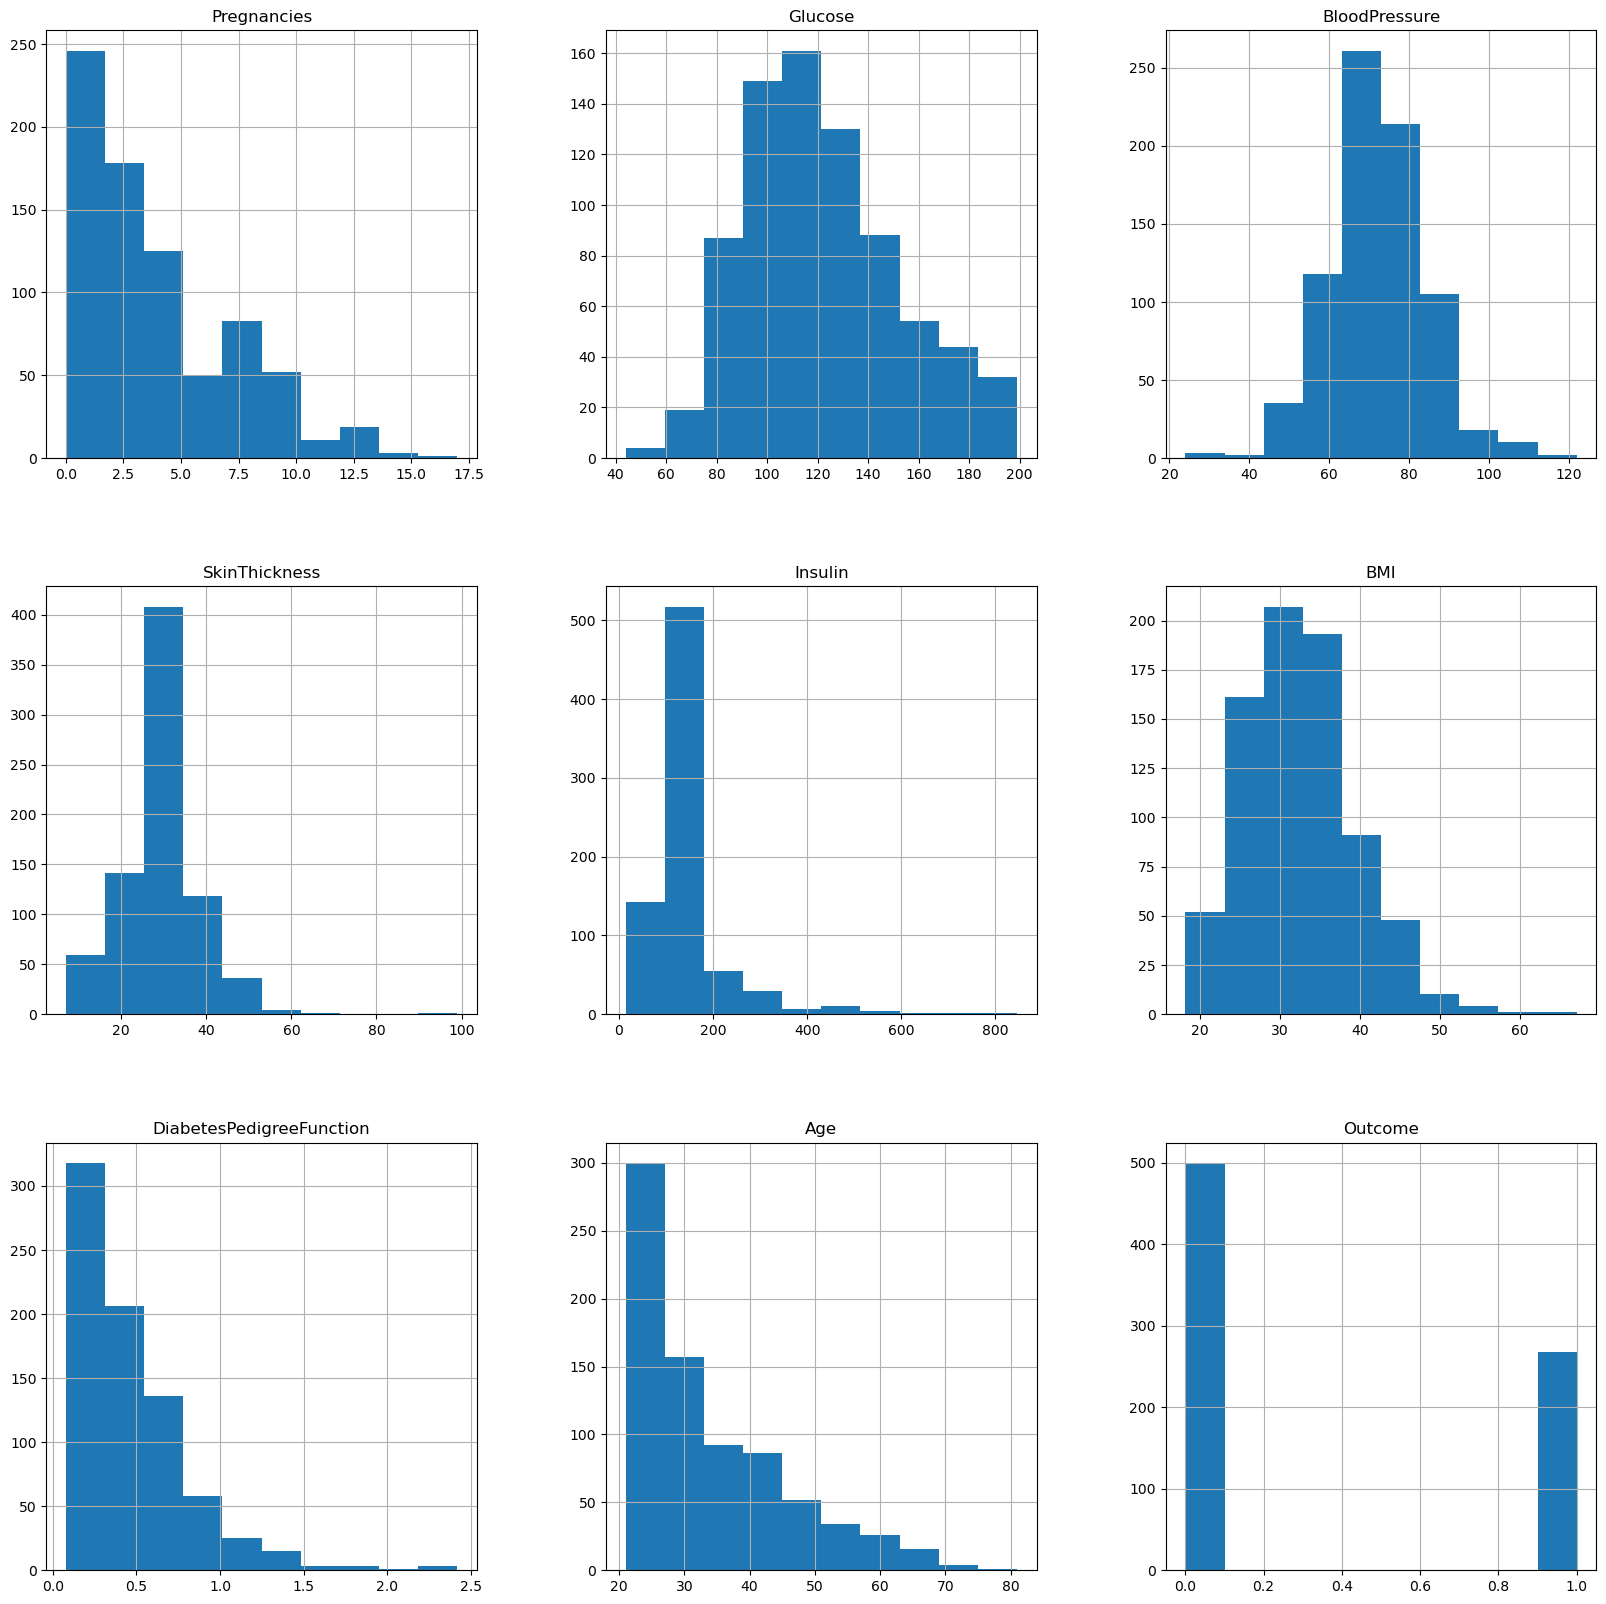

In [7]:
#plot the data distribution plots
p = diabetes_df_copy.hist(figsize = (20,20))

Split the data 

In [8]:
X = diabetes_df_copy.iloc[:,0:8]
y = diabetes_df_copy.iloc[:,8]

#splitting the data into train and test

Clustering 

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
y_pred = GaussianMixture(n_components=2, random_state = 42).fit_predict(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans 

In [11]:
from sklearn.cluster import KMeans


In [12]:
k=8
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [13]:
y_pred 

array([4, 0, 4, 5, 4, 0, 5, 0, 1, 0, 0, 4, 4, 7, 4, 0, 6, 0, 5, 5, 6, 0,
       4, 0, 4, 5, 4, 0, 5, 0, 0, 6, 2, 0, 0, 0, 4, 0, 0, 6, 5, 4, 0, 6,
       4, 4, 4, 0, 0, 0, 5, 2, 2, 3, 3, 0, 3, 5, 4, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 2, 5, 5, 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 5, 0, 2,
       5, 0, 0, 0, 2, 4, 5, 6, 0, 2, 2, 6, 4, 4, 0, 2, 0, 0, 0, 4, 2, 2,
       4, 1, 2, 0, 4, 4, 0, 0, 0, 2, 5, 0, 5, 4, 0, 5, 0, 5, 0, 0, 4, 0,
       6, 0, 2, 0, 2, 5, 0, 3, 0, 0, 2, 0, 3, 0, 0, 5, 4, 0, 6, 0, 4, 1,
       4, 4, 5, 0, 2, 4, 4, 5, 3, 0, 4, 0, 4, 0, 0, 5, 0, 4, 0, 2, 2, 4,
       0, 4, 4, 4, 0, 5, 2, 0, 4, 4, 1, 2, 5, 4, 0, 5, 4, 4, 0, 6, 0, 2,
       5, 3, 0, 4, 0, 2, 0, 0, 3, 4, 5, 4, 0, 4, 4, 4, 0, 3, 0, 5, 0, 0,
       1, 4, 0, 6, 2, 2, 0, 4, 7, 2, 4, 3, 2, 0, 2, 4, 4, 4, 4, 0, 0, 5,
       4, 0, 6, 4, 0, 7, 3, 0, 0, 0, 2, 0, 6, 0, 0, 0, 3, 4, 4, 4, 0, 4,
       0, 2, 4, 0, 0, 4, 0, 2, 0, 2, 0, 2, 0, 5, 0, 3, 4, 5, 4, 4, 0, 4,
       1, 6, 2, 5, 2, 5, 0, 6, 4, 4, 3, 6, 0, 0, 4,

In [14]:
y_pred is kmeans.labels_

#each instance belongs to a unique cluster, one of the 8 

True

In [15]:
kmeans.cluster_centers_  #these are the 8 clusters estimated 

array([[4.04180064e+00, 1.05622981e+02, 7.16833916e+01, 2.87146169e+01,
        1.56572005e+02, 3.12158108e+01, 4.11575563e-01, 3.29228296e+01],
       [3.25000000e+00, 1.60312500e+02, 7.28750000e+01, 3.50625000e+01,
        5.01500000e+02, 3.56187500e+01, 5.70437500e-01, 3.31250000e+01],
       [2.52222222e+00, 9.30187418e+01, 6.89555556e+01, 2.57666667e+01,
        5.21333333e+01, 3.04722222e+01, 4.95366667e-01, 2.67555556e+01],
       [4.18181818e+00, 1.53575758e+02, 7.13333333e+01, 3.00909091e+01,
        3.15090909e+02, 3.49696970e+01, 5.52212121e-01, 3.46969697e+01],
       [4.73684211e+00, 1.56251462e+02, 7.71850682e+01, 3.05297100e+01,
        1.53246445e+02, 3.41488741e+01, 5.01350877e-01, 3.93216374e+01],
       [3.05882353e+00, 1.13392157e+02, 6.83823529e+01, 2.78529412e+01,
        9.71568627e+01, 3.18417398e+01, 4.77647059e-01, 2.92450980e+01],
       [3.61904762e+00, 1.37285714e+02, 7.60476190e+01, 3.40476190e+01,
        2.20666667e+02, 3.68190476e+01, 5.91976190e-01, 3.

Note that the KMeans instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the label of an instance is the index of the cluster that instance gets assigned to

The K-Means Algorithm
1. First initialize k centroids randomly: k distinct instances are chosen randomly from the dataset and the centroids are placed at their locations
2. Repeat until convergence (i.e., until the centroids stop moving):
        -: Assign each instance to the closest centroid.
        -: Update the centroids to be the mean of the instances that are assigned to them.

In [16]:
kmeans_iter1 = KMeans(n_clusters=8, init="random", n_init=1,
                      algorithm="full",max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=8, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                               algorithm="full", max_iter=3, random_state=0)

In [17]:
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklear

KMeans(algorithm='full', init='random', max_iter=3, n_init=1, random_state=0)

In [18]:
kmeans.inertia_
#too high 

778629.8611184229

inertia is the sum of the squared distances between each training instance and its closest centroid.

Multiple Initializations -: to solve the variability issue, use the n_init hyperparameter to minimize the inertia 

In [19]:
kmeans_rnd_10_inits = KMeans(n_clusters=8, init="random", n_init=10,
                              algorithm="full", random_state=0)
kmeans_rnd_10_inits.fit(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(algorithm='full', init='random', n_init=10, random_state=0)

Finding the optimal number of clusters using the silhoutte score 

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.3400078314321833

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
               for i in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [23]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

NOTES:
1. Kmeans did not perform well since the input features was not scaled intitally

2. Clusters ended up being stretched 